# **2. Exploratory Data Analysis**

## **Part 0: Import Modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import clear_output
import pickle
import warnings # For handling error messages.
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)

In [2]:
filepath = '/Volumes/My Passport for Mac/ipl-player-salary/FinalDFs/'

# **Part 1: Batting**

### **(I) Loading and Cleaning the data**

In [3]:
batting_file = filepath + 'batting_merged.pkl'

# Load the .pkl file as a dataframe
batting_df = pd.read_pickle(batting_file)
batting_df.head()

Player       Country                  Role Season  \
32  AB de Villiers  South Africa  Wicketkeeper batsman   2008   
33  AB de Villiers  South Africa  Wicketkeeper batsman   2008   
34  AB de Villiers  South Africa  Wicketkeeper batsman   2008   
29  AB de Villiers  South Africa  Wicketkeeper batsman   2009   
30  AB de Villiers  South Africa  Wicketkeeper batsman   2009   

                Team  SalaryUSD MatchCount  SeasonCount  phase  balls_faced  \
32  Delhi Daredevils     300000          6            1    1.0         30.0   
33  Delhi Daredevils     300000          6            1    2.0         63.0   
34  Delhi Daredevils     300000          6            1    3.0          7.0   
29  Delhi Daredevils     300000         15            2    1.0         65.0   
30  Delhi Daredevils     300000         15            2    2.0        239.0   

    total_runs  batting_avg  strike_rate  boundary_prob  wicket_prob  
32        28.0        14.00    93.333333       0.100000     0.066667  
33        59.0        29.50    93.650794       0.031746     0.031746  
34         8.0         8.00   114.285714       0.142857     0.000000  
29        61.0        30.50    93.846154       0.138462     0.030769  
30       287.0        71.75   120.083682       0.104603     0.016736

In [4]:
# Turn the match count into an integer
batting_df.MatchCount = batting_df.MatchCount.astype('int')
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526 entries, 32 to 1504
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         1526 non-null   object 
 1   Country        1526 non-null   object 
 2   Role           1526 non-null   object 
 3   Season         1526 non-null   object 
 4   Team           1526 non-null   object 
 5   SalaryUSD      1526 non-null   int64  
 6   MatchCount     1526 non-null   int64  
 7   SeasonCount    1526 non-null   int64  
 8   phase          1524 non-null   float64
 9   balls_faced    1524 non-null   float64
 10  total_runs     1524 non-null   float64
 11  batting_avg    1524 non-null   float64
 12  strike_rate    1524 non-null   float64
 13  boundary_prob  1524 non-null   float64
 14  wicket_prob    1524 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 190.8+ KB


In [5]:
# Let us turn this into one row for each player for each year.
batting_pivot = batting_df.pivot(['Player', 'Country', 'Role', 'Season', 'Team', 'SalaryUSD', 'MatchCount', 'SeasonCount'], columns='phase')
# Change the column names
batting_pivot.columns = [f'{col[0]}_{col[1]}' for col in batting_pivot.columns]
# reset the index
batting_pivot.reset_index(inplace=True)
# remove the unnecessary columns
batting_filtered = batting_pivot.filter(regex='^(?!.*_nan$)')
batting_filtered.tail()

Player Country                  Role  Season                 Team  \
585  Yuvraj Singh   India  Middle-order batsman    2015     Delhi Daredevils   
586  Yuvraj Singh   India  Middle-order batsman    2016  Sunrisers Hyderabad   
587  Yuvraj Singh   India  Middle-order batsman    2017  Sunrisers Hyderabad   
588  Yuvraj Singh   India  Middle-order batsman    2018      Kings XI Punjab   
589  Yuvraj Singh   India  Middle-order batsman    2019       Mumbai Indians   

     SalaryUSD  MatchCount  SeasonCount  balls_faced_1.0  balls_faced_2.0  \
585    2666667          14            7             21.0            167.0   
586    1050000          10            8              5.0            149.0   
587    1050000          12            9              3.0            136.0   
588     312500           8           10             16.0             54.0   
589     142900           4           11              NaN             74.0   

     ...  batting_avg_3.0  strike_rate_1.0  strike_rate_2.0  strike_rate_3.0  \
585  ...         8.000000        95.238095       112.574850       148.148148   
586  ...        15.333333       120.000000       123.489933       158.620690   
587  ...        17.800000       133.333333       116.911765       181.632653   
588  ...         1.000000        87.500000        92.592593        25.000000   
589  ...         6.000000              NaN       124.324324        66.666667   

     boundary_prob_1.0  boundary_prob_2.0  boundary_prob_3.0  wicket_prob_1.0  \
585           0.190476           0.137725           0.222222           0.0000   
586           0.200000           0.174497           0.275862           0.0000   
587           0.333333           0.161765           0.306122           0.0000   
588           0.187500           0.092593           0.000000           0.0625   
589                NaN           0.162162           0.111111              NaN   

     wicket_prob_2.0  wicket_prob_3.0  
585         0.047904         0.185185  
586         0.046980         0.103448  
587         0.036765         0.102041  
588         0.055556         0.250000  
589         0.040541         0.111111  

[5 rows x 26 columns]

In [6]:
# Let us now check for NaN values
bat_columns_with_nan = batting_filtered.columns[batting_filtered.isna().any()].tolist()
print(bat_columns_with_nan)

# Since all of these are numeric columns, we will fill these NaN values with 0.
for col in bat_columns_with_nan:
    batting_filtered[col].fillna(0, inplace=True)

batting_filtered.tail()

['balls_faced_1.0', 'balls_faced_2.0', 'balls_faced_3.0', 'total_runs_1.0', 'total_runs_2.0', 'total_runs_3.0', 'batting_avg_1.0', 'batting_avg_2.0', 'batting_avg_3.0', 'strike_rate_1.0', 'strike_rate_2.0', 'strike_rate_3.0', 'boundary_prob_1.0', 'boundary_prob_2.0', 'boundary_prob_3.0', 'wicket_prob_1.0', 'wicket_prob_2.0', 'wicket_prob_3.0']


Player Country                  Role  Season                 Team  \
585  Yuvraj Singh   India  Middle-order batsman    2015     Delhi Daredevils   
586  Yuvraj Singh   India  Middle-order batsman    2016  Sunrisers Hyderabad   
587  Yuvraj Singh   India  Middle-order batsman    2017  Sunrisers Hyderabad   
588  Yuvraj Singh   India  Middle-order batsman    2018      Kings XI Punjab   
589  Yuvraj Singh   India  Middle-order batsman    2019       Mumbai Indians   

     SalaryUSD  MatchCount  SeasonCount  balls_faced_1.0  balls_faced_2.0  \
585    2666667          14            7             21.0            167.0   
586    1050000          10            8              5.0            149.0   
587    1050000          12            9              3.0            136.0   
588     312500           8           10             16.0             54.0   
589     142900           4           11              0.0             74.0   

     ...  batting_avg_3.0  strike_rate_1.0  strike_rate_2.0  strike_rate_3.0  \
585  ...         8.000000        95.238095       112.574850       148.148148   
586  ...        15.333333       120.000000       123.489933       158.620690   
587  ...        17.800000       133.333333       116.911765       181.632653   
588  ...         1.000000        87.500000        92.592593        25.000000   
589  ...         6.000000         0.000000       124.324324        66.666667   

     boundary_prob_1.0  boundary_prob_2.0  boundary_prob_3.0  wicket_prob_1.0  \
585           0.190476           0.137725           0.222222           0.0000   
586           0.200000           0.174497           0.275862           0.0000   
587           0.333333           0.161765           0.306122           0.0000   
588           0.187500           0.092593           0.000000           0.0625   
589           0.000000           0.162162           0.111111           0.0000   

     wicket_prob_2.0  wicket_prob_3.0  
585         0.047904         0.185185  
586         0.046980         0.103448  
587         0.036765         0.102041  
588         0.055556         0.250000  
589         0.040541         0.111111  

[5 rows x 26 columns]

In [7]:
# Let us now keep track of when a player changed teams
batting_filtered['changed_teams'] = 0
changed_teams_years = (batting_filtered['Player'] == batting_filtered['Player'].shift(1)) & (batting_filtered['Team'] != batting_filtered['Team'].shift(1))
batting_filtered.loc[changed_teams_years, 'changed_teams'] = 1
batting_filtered[batting_filtered['Player'] == 'AJ Finch']

# Let us also keep track of the next-year salary
batting_filtered['NY_SalaryUSD'] = np.nan
player_change = (batting_filtered['Player'] != batting_filtered['Player'].shift(-1))
batting_filtered.loc[~player_change, 'NY_SalaryUSD'] = batting_filtered['SalaryUSD'].shift(-1)
batting_filtered['NY_SalaryUSD'] = batting_filtered['NY_SalaryUSD'].astype('float')

# Reorder the columns
salary_index = batting_filtered.columns.get_loc('SalaryUSD')
batting_cols = list(batting_filtered.columns)
batting_cols.remove('NY_SalaryUSD')
batting_cols.insert(salary_index, 'NY_SalaryUSD')
batting_filtered = batting_filtered[batting_cols]

batting_filtered.head()

Player       Country                  Role  Season  \
0  AB de Villiers  South Africa  Wicketkeeper batsman    2008   
1  AB de Villiers  South Africa  Wicketkeeper batsman    2009   
2  AB de Villiers  South Africa  Wicketkeeper batsman    2010   
3  AB de Villiers  South Africa  Wicketkeeper batsman    2011   
4  AB de Villiers  South Africa  Wicketkeeper batsman    2012   

                          Team  NY_SalaryUSD  SalaryUSD  MatchCount  \
0             Delhi Daredevils      300000.0     300000           6   
1             Delhi Daredevils      300000.0     300000          15   
2             Delhi Daredevils     1100000.0     300000           7   
3  Royal Challengers Bangalore     1100000.0    1100000          16   
4  Royal Challengers Bangalore     1100000.0    1100000          15   

   SeasonCount  balls_faced_1.0  ...  strike_rate_1.0  strike_rate_2.0  \
0            1             30.0  ...        93.333333        93.650794   
1            2             65.0  ...        93.846154       120.083682   
2            3             53.0  ...        90.566038        90.000000   
3            4             36.0  ...        91.666667       113.095238   
4            5              7.0  ...       128.571429       116.129032   

   strike_rate_3.0  boundary_prob_1.0  boundary_prob_2.0  boundary_prob_3.0  \
0       114.285714           0.100000           0.031746           0.142857   
1       212.727273           0.138462           0.104603           0.309091   
2         0.000000           0.113208           0.014286           0.000000   
3       202.272727           0.138889           0.113095           0.250000   
4       230.555556           0.142857           0.096774           0.388889   

   wicket_prob_1.0  wicket_prob_2.0  wicket_prob_3.0  changed_teams  
0         0.066667         0.031746         0.000000              0  
1         0.030769         0.016736         0.054545              0  
2         0.000000         0.100000         0.000000              0  
3         0.027778         0.023810         0.068182              1  
4         0.142857         0.032258         0.041667              0  

[5 rows x 28 columns]

In [8]:
# drop the rows which are missing the next year salary
batting_salary_df = batting_filtered.dropna(subset=['NY_SalaryUSD'])
# drop instances of when the next year salary and current salary are the same
batting_salary_df = batting_salary_df[batting_salary_df['NY_SalaryUSD'] != batting_salary_df['SalaryUSD']]

### **(II) Initial Visualizations**

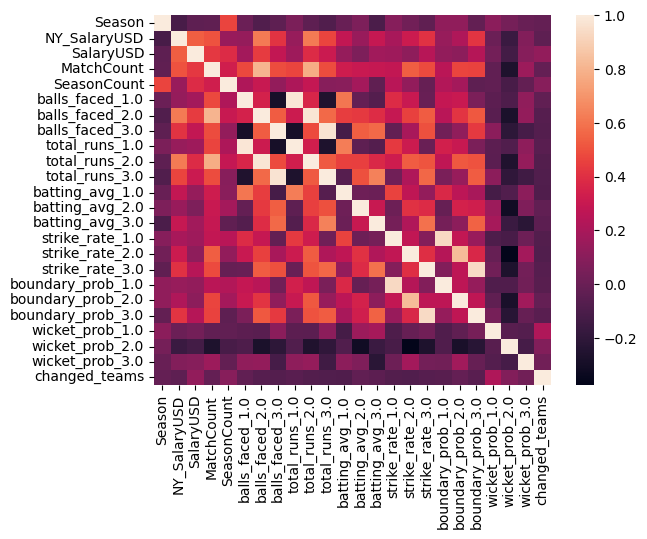

In [9]:
# find the correlations of the variables amongst each other
batting_corr = batting_salary_df.corr()
sns.heatmap(batting_corr)
plt.show()

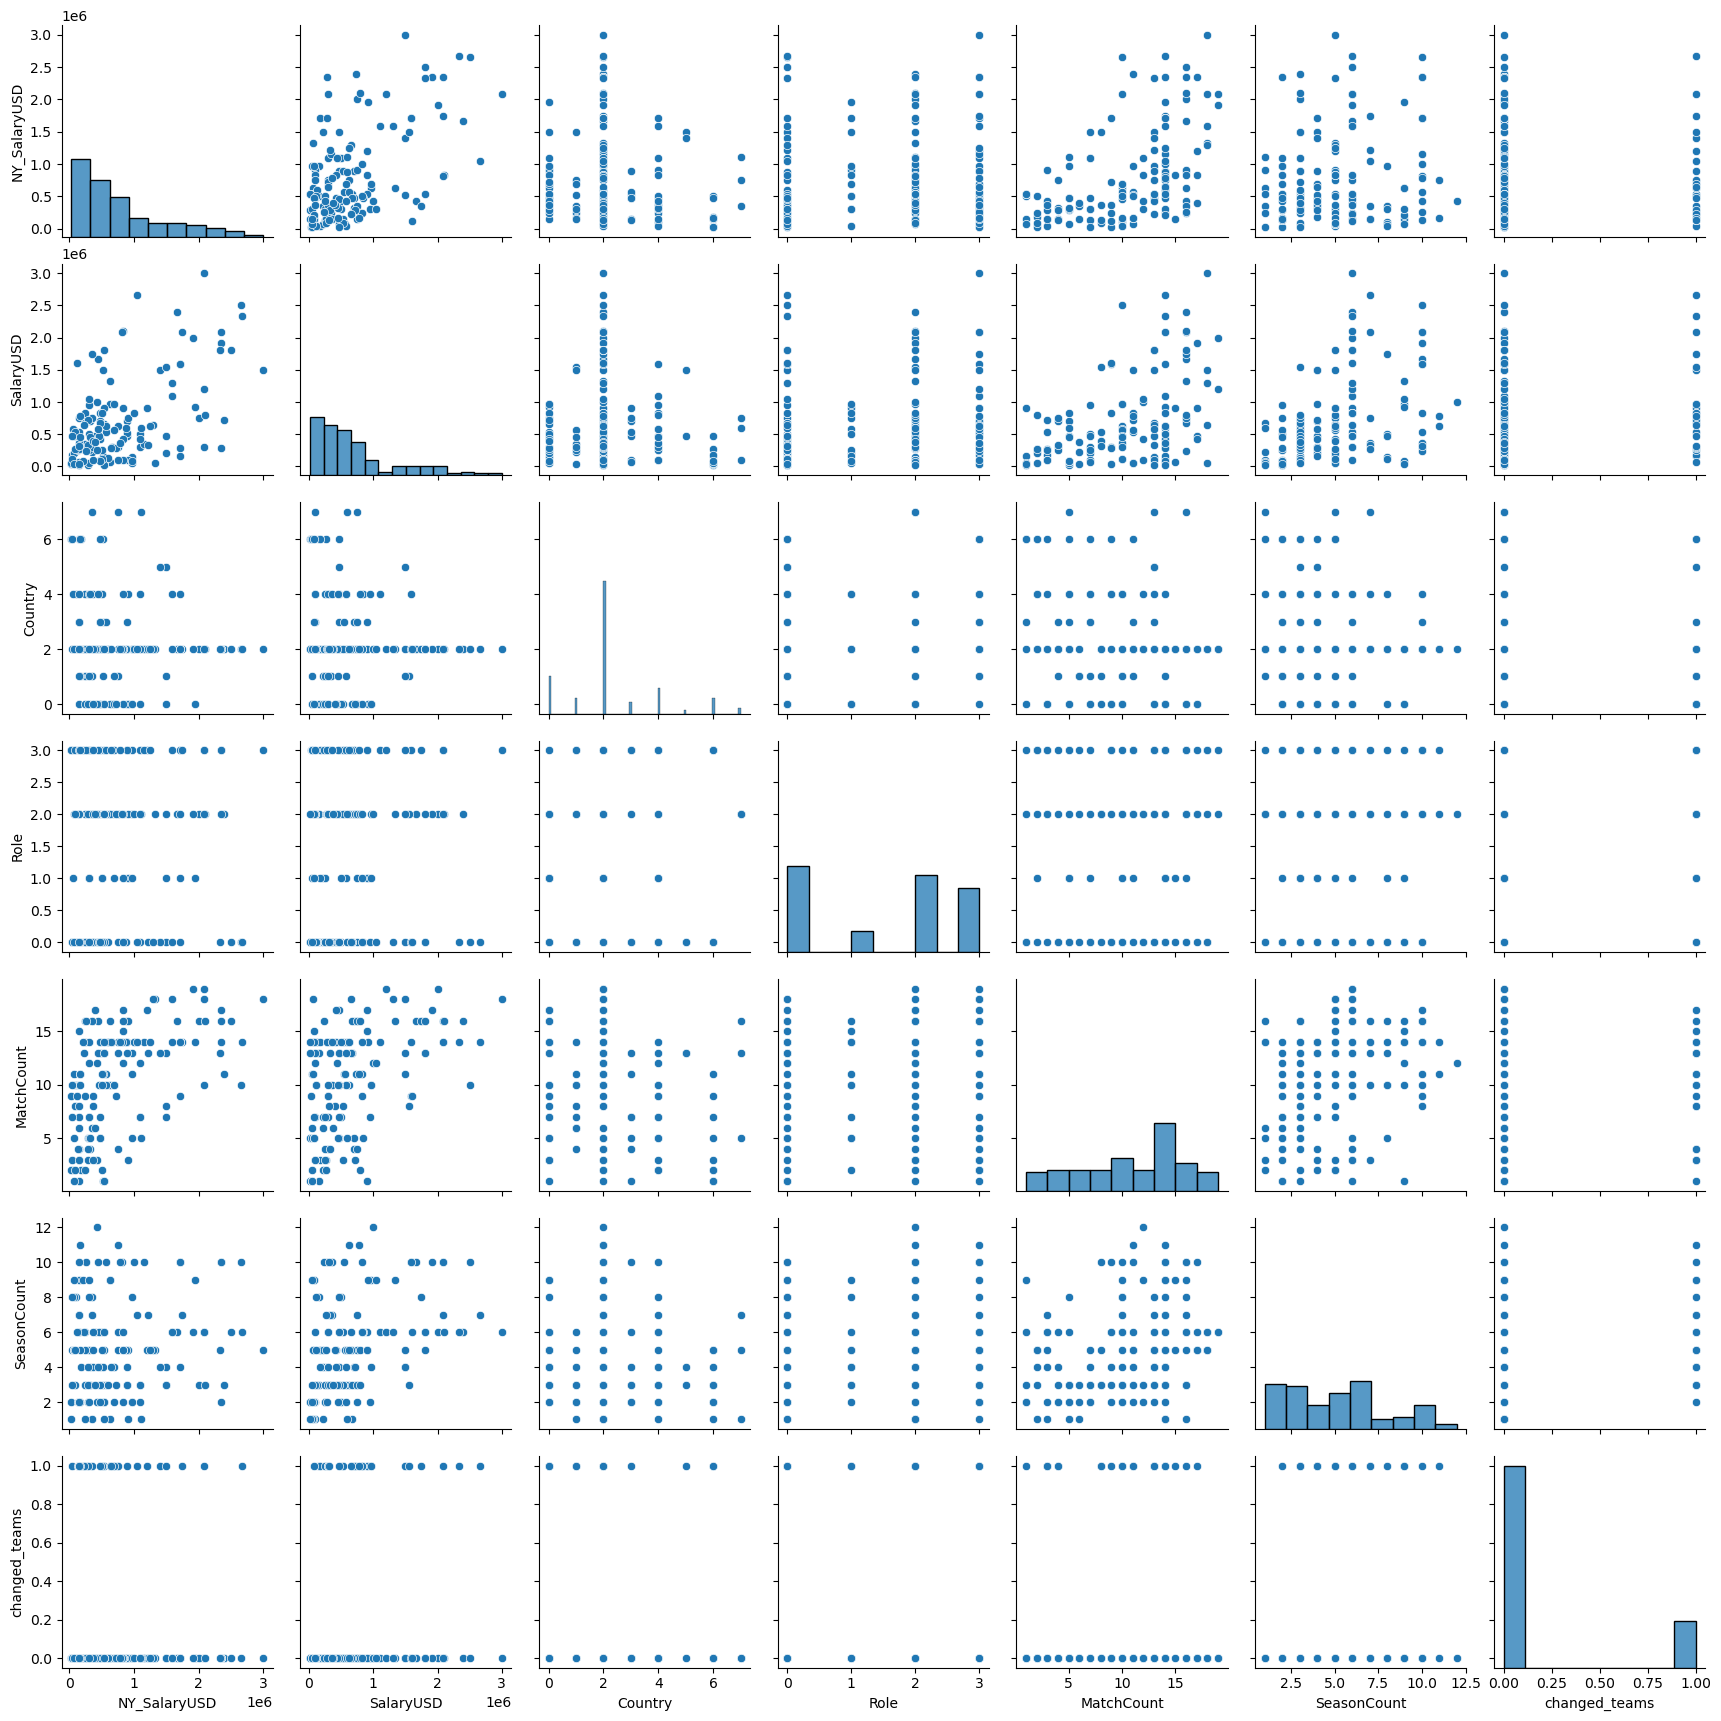

In [10]:
# Let us pairplot the NY_SalaryUSD with the other general player stats
gen_columns = ['NY_SalaryUSD', 'SalaryUSD', 'Country', 'Role', 'Team', 'MatchCount', 'SeasonCount', 'changed_teams']
gen_batting_df = batting_salary_df[gen_columns].copy()

# Perform label encoding for categorical variables
label_encoder = LabelEncoder()
gen_batting_df['Country'] = label_encoder.fit_transform(gen_batting_df['Country'])
gen_batting_df['Role'] = label_encoder.fit_transform(gen_batting_df['Role'])

sns.pairplot(gen_batting_df)
plt.show()

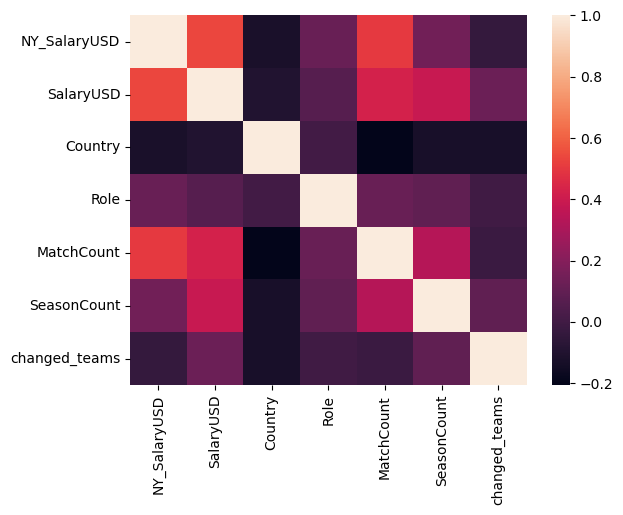

In [48]:
sns.heatmap(gen_batting_df.corr())
plt.show()

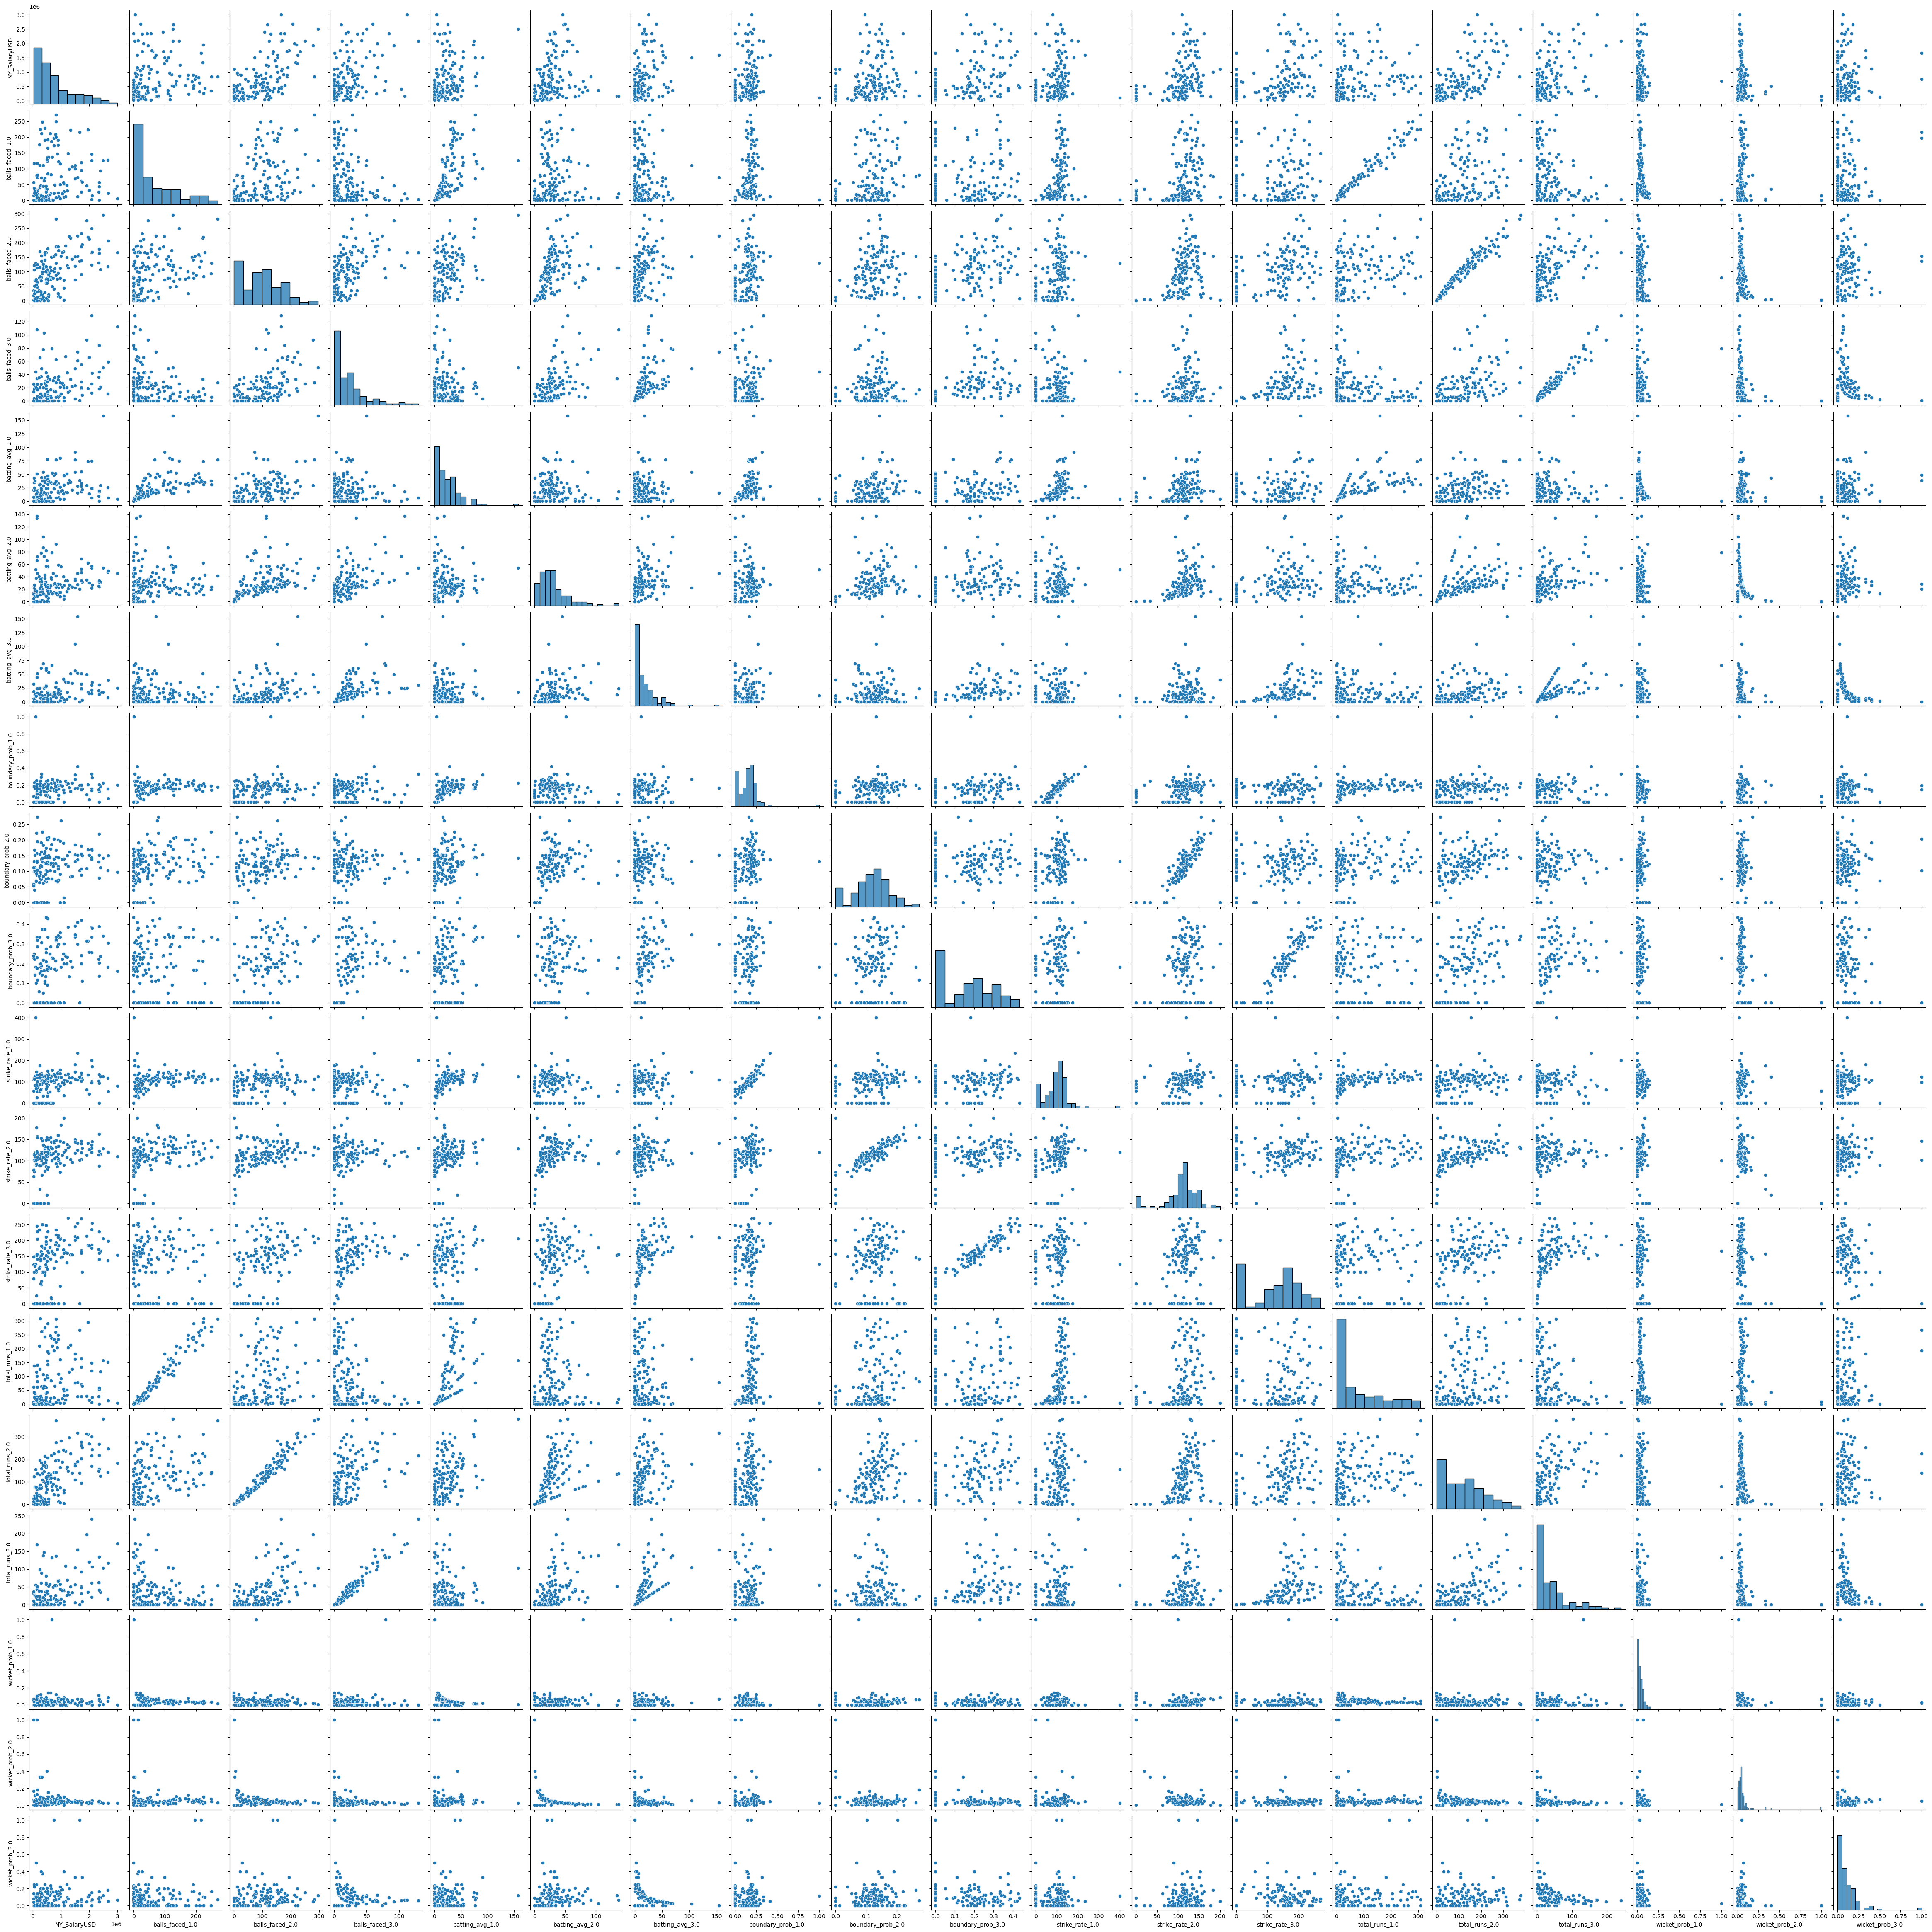

In [21]:
# Let's do the same thing for the statistics columns
stats_cols = list(set(batting_salary_df.columns) - set(gen_columns[1:]))
stats_cols = [col for col in stats_cols if col not in ['Player', 'Season']]
stats_cols = sorted(stats_cols, key=lambda x: (x != 'NY_SalaryUSD', x))

stats_batting_df = batting_salary_df[stats_cols]
sns.pairplot(stats_batting_df)
plt.show()


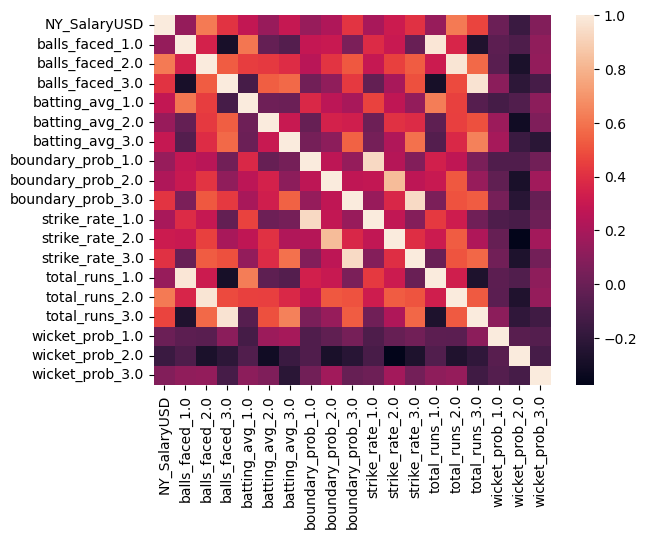

In [46]:
sns.heatmap(stats_batting_df.corr())
plt.show()

Let's also take a look at the breakdown of average salary by country.

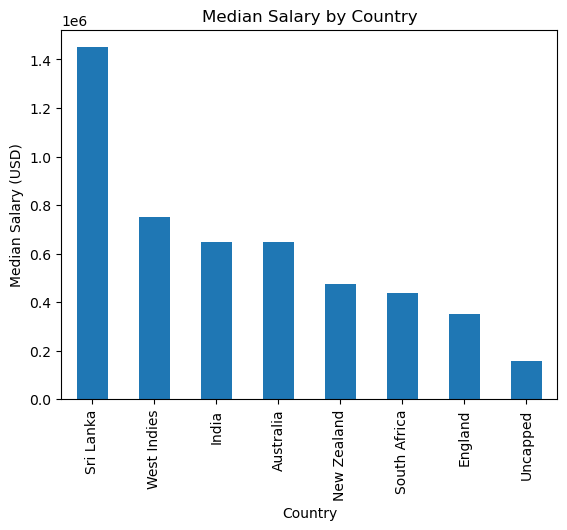

In [19]:
avg_by_country = batting_salary_df.groupby('Country')['NY_SalaryUSD'].median()
avg_by_country = avg_by_country.sort_values(ascending=False)
avg_by_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary by Country')
plt.show()

Let us also take a look at the breakdown by role.

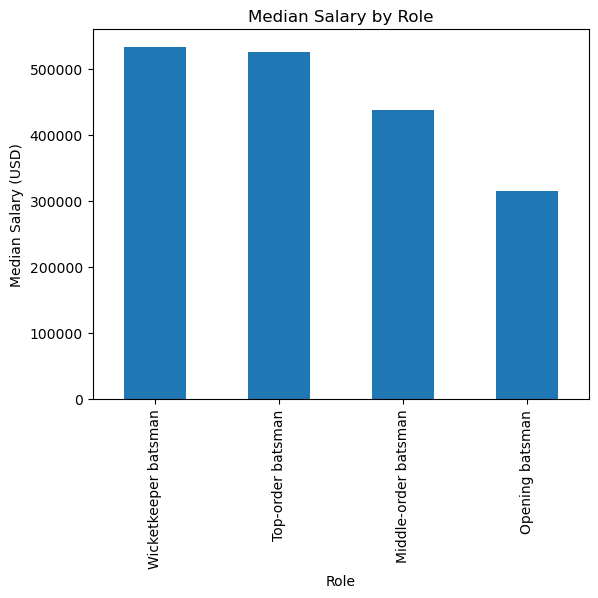

In [20]:
avg_by_role = batting_filtered.groupby('Role')['SalaryUSD'].median()
avg_by_role = avg_by_role.sort_values(ascending=False)

avg_by_role.plot(kind='bar')
plt.xlabel('Role')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary by Role')
plt.show()

## **Part 2: Bowling**

### **(I) Loading and Cleaning the data**

In [22]:
bowling_file = filepath + 'bowling_merged.pkl'

# Load the .pkl file as a dataframe
bowling_df = pd.read_pickle(bowling_file)
bowling_df.head()

Player   Country    Role Season                         Team  \
0  A Ashish Reddy  Uncapped  Bowler   2015          Sunrisers Hyderabad   
1  A Ashish Reddy  Uncapped  Bowler   2015          Sunrisers Hyderabad   
2  A Ashish Reddy  Uncapped  Bowler   2016          Sunrisers Hyderabad   
3     A Choudhary  Uncapped  Bowler   2017  Royal Challengers Bangalore   
4     A Choudhary  Uncapped  Bowler   2017  Royal Challengers Bangalore   

   SalaryUSD MatchCount  SeasonCount  phase  balls_bowled  total_wickets  \
0      33000          6            3    2.0          31.0            3.0   
1      33000          6            3    3.0           6.0            1.0   
2      33000          4            4    2.0          23.0            1.0   
3     299000          5            1    1.0          37.0            3.0   
4     299000          5            1    2.0          44.0            1.0   

   bowling_avg    economy  strike_rate  boundary_prob  wicket_prob  
0    15.666667   9.096774    10.333333       0.129032     0.096774  
1     4.000000   4.000000     6.000000       0.000000     0.166667  
2    40.000000  10.434783    23.000000       0.260870     0.043478  
3    15.333333   7.459459    12.333333       0.189189     0.081081  
4    58.000000   7.909091    44.000000       0.181818     0.022727

In [23]:
# Turn the match count into an integer
bowling_df.MatchCount = bowling_df.MatchCount.astype('int')
bowling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406 entries, 0 to 1405
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         1406 non-null   object 
 1   Country        1406 non-null   object 
 2   Role           1406 non-null   object 
 3   Season         1406 non-null   object 
 4   Team           1406 non-null   object 
 5   SalaryUSD      1406 non-null   int64  
 6   MatchCount     1406 non-null   int64  
 7   SeasonCount    1406 non-null   int64  
 8   phase          1405 non-null   float64
 9   balls_bowled   1405 non-null   float64
 10  total_wickets  1405 non-null   float64
 11  bowling_avg    1405 non-null   float64
 12  economy        1405 non-null   float64
 13  strike_rate    1405 non-null   float64
 14  boundary_prob  1405 non-null   float64
 15  wicket_prob    1405 non-null   float64
dtypes: float64(8), int64(3), object(5)
memory usage: 186.7+ KB


In [24]:
# Let us turn this into one row for each player for each year.
bowling_pivot = bowling_df.pivot(['Player', 'Country', 'Role', 'Season', 'Team', 'SalaryUSD', 'MatchCount', 'SeasonCount'], columns='phase')
# Change the column names
bowling_pivot.columns = [f'{col[0]}_{col[1]}' for col in bowling_pivot.columns]
# reset the index
bowling_pivot.reset_index(inplace=True)
# remove the unnecessary columns
bowling_filtered = bowling_pivot.filter(regex='^(?!.*_nan$)')
bowling_filtered.tail()

Player Country    Role  Season                         Team  SalaryUSD  \
516  Z Khan   India  Bowler    2013  Royal Challengers Bangalore     900000   
517  Z Khan   India  Bowler    2014               Mumbai Indians     433000   
518  Z Khan   India  Bowler    2015             Delhi Daredevils     666667   
519  Z Khan   India  Bowler    2016             Delhi Daredevils     666667   
520  Z Khan   India  Bowler    2017             Delhi Daredevils     666667   

     MatchCount  SeasonCount  balls_bowled_1.0  balls_bowled_2.0  ...  \
516           2            6              26.0              12.0  ...   
517           6            7              87.0              19.0  ...   
518           7            8             113.0               6.0  ...   
519          12            9             171.0              45.0  ...   
520          11           10             142.0              80.0  ...   

     economy_3.0  strike_rate_1.0  strike_rate_2.0  strike_rate_3.0  \
516          NaN         8.666667         6.000000              NaN   
517     8.812500        17.400000        19.000000            32.00   
518     9.833333        18.833333         6.000000            18.00   
519     8.836364        34.200000        15.000000            13.75   
520    12.750000        23.666667        26.666667             8.00   

     boundary_prob_1.0  boundary_prob_2.0  boundary_prob_3.0  wicket_prob_1.0  \
516           0.076923           0.416667                NaN         0.115385   
517           0.126437           0.157895           0.156250         0.057471   
518           0.106195           0.166667           0.222222         0.053097   
519           0.163743           0.244444           0.163636         0.029240   
520           0.133803           0.175000           0.291667         0.042254   

     wicket_prob_2.0  wicket_prob_3.0  
516         0.166667              NaN  
517         0.000000         0.031250  
518         0.000000         0.055556  
519         0.066667         0.072727  
520         0.037500         0.125000  

[5 rows x 29 columns]

In [25]:
# Let us now check for NaN values
bowl_columns_with_nan = bowling_filtered.columns[bowling_filtered.isna().any()].tolist()
print(bowl_columns_with_nan)

# Since all of these are numeric columns, we will fill these NaN values with 0.
for col in bowl_columns_with_nan:
    bowling_filtered[col].fillna(0, inplace=True)

bowling_filtered.tail()

['balls_bowled_1.0', 'balls_bowled_2.0', 'balls_bowled_3.0', 'total_wickets_1.0', 'total_wickets_2.0', 'total_wickets_3.0', 'bowling_avg_1.0', 'bowling_avg_2.0', 'bowling_avg_3.0', 'economy_1.0', 'economy_2.0', 'economy_3.0', 'strike_rate_1.0', 'strike_rate_2.0', 'strike_rate_3.0', 'boundary_prob_1.0', 'boundary_prob_2.0', 'boundary_prob_3.0', 'wicket_prob_1.0', 'wicket_prob_2.0', 'wicket_prob_3.0']


Player Country    Role  Season                         Team  SalaryUSD  \
516  Z Khan   India  Bowler    2013  Royal Challengers Bangalore     900000   
517  Z Khan   India  Bowler    2014               Mumbai Indians     433000   
518  Z Khan   India  Bowler    2015             Delhi Daredevils     666667   
519  Z Khan   India  Bowler    2016             Delhi Daredevils     666667   
520  Z Khan   India  Bowler    2017             Delhi Daredevils     666667   

     MatchCount  SeasonCount  balls_bowled_1.0  balls_bowled_2.0  ...  \
516           2            6              26.0              12.0  ...   
517           6            7              87.0              19.0  ...   
518           7            8             113.0               6.0  ...   
519          12            9             171.0              45.0  ...   
520          11           10             142.0              80.0  ...   

     economy_3.0  strike_rate_1.0  strike_rate_2.0  strike_rate_3.0  \
516     0.000000         8.666667         6.000000             0.00   
517     8.812500        17.400000        19.000000            32.00   
518     9.833333        18.833333         6.000000            18.00   
519     8.836364        34.200000        15.000000            13.75   
520    12.750000        23.666667        26.666667             8.00   

     boundary_prob_1.0  boundary_prob_2.0  boundary_prob_3.0  wicket_prob_1.0  \
516           0.076923           0.416667           0.000000         0.115385   
517           0.126437           0.157895           0.156250         0.057471   
518           0.106195           0.166667           0.222222         0.053097   
519           0.163743           0.244444           0.163636         0.029240   
520           0.133803           0.175000           0.291667         0.042254   

     wicket_prob_2.0  wicket_prob_3.0  
516         0.166667         0.000000  
517         0.000000         0.031250  
518         0.000000         0.055556  
519         0.066667         0.072727  
520         0.037500         0.125000  

[5 rows x 29 columns]

In [31]:
# Let us now keep track of when a player changed teams
bowling_filtered['changed_teams'] = 0
changed_teams_years = (bowling_filtered['Player'] == bowling_filtered['Player'].shift(1)) & (bowling_filtered['Team'] != bowling_filtered['Team'].shift(1))
bowling_filtered.loc[changed_teams_years, 'changed_teams'] = 1

# Let us also keep track of the next-year salary
bowling_filtered['NY_SalaryUSD'] = np.nan
player_change = (bowling_filtered['Player'] != bowling_filtered['Player'].shift(-1))
bowling_filtered.loc[~player_change, 'NY_SalaryUSD'] = bowling_filtered['SalaryUSD'].shift(-1)
bowling_filtered['NY_SalaryUSD'] = bowling_filtered['NY_SalaryUSD'].astype('float')

# Reorder the columns
salary_index = bowling_filtered.columns.get_loc('SalaryUSD')
bowling_cols = list(bowling_filtered.columns)
bowling_cols.remove('NY_SalaryUSD')
bowling_cols.insert(salary_index, 'NY_SalaryUSD')
bowling_filtered = bowling_filtered[bowling_cols]

bowling_filtered[bowling_filtered['Player'] == 'R Ashwin']

Player Country    Role  Season                     Team  SalaryUSD  \
358  R Ashwin   India  Bowler    2011      Chennai Super Kings     850000   
359  R Ashwin   India  Bowler    2012      Chennai Super Kings     850000   
360  R Ashwin   India  Bowler    2013      Chennai Super Kings     850000   
361  R Ashwin   India  Bowler    2014      Chennai Super Kings    1250000   
362  R Ashwin   India  Bowler    2015      Chennai Super Kings    1250000   
363  R Ashwin   India  Bowler    2016  Rising Pune Supergiants    1250000   
364  R Ashwin   India  Bowler    2018          Kings XI Punjab    1187500   
365  R Ashwin   India  Bowler    2019          Kings XI Punjab    1187500   
366  R Ashwin   India  Bowler    2020           Delhi Capitals    1100000   

     NY_SalaryUSD  MatchCount  SeasonCount  balls_bowled_1.0  ...  \
358      850000.0          16            3             172.0  ...   
359      850000.0          18            4             152.0  ...   
360     1250000.0          18            5              43.0  ...   
361     1250000.0          16            6              93.0  ...   
362     1250000.0          14            7              68.0  ...   
363     1187500.0          14            8              53.0  ...   
364     1187500.0          14            9              46.0  ...   
365     1100000.0          14           10              69.0  ...   
366           NaN          15           11             104.0  ...   

     strike_rate_1.0  strike_rate_2.0  strike_rate_3.0  boundary_prob_1.0  \
358        14.333333        19.750000        55.000000           0.122093   
359        38.000000        23.444444         6.500000           0.131579   
360        43.000000        19.933333        12.000000           0.139535   
361        15.500000        36.571429         7.500000           0.107527   
362        68.000000        20.625000         7.000000           0.117647   
363        26.500000        31.833333        11.333333           0.188679   
364        46.000000        30.375000        12.500000           0.152174   
365        34.500000        17.000000        18.000000           0.173913   
366        13.000000        28.000000        12.000000           0.125000   

     boundary_prob_2.0  boundary_prob_3.0  wicket_prob_1.0  wicket_prob_2.0  \
358           0.101266           0.090909         0.069767         0.050633   
359           0.080569           0.051282         0.026316         0.042654   
360           0.096990           0.166667         0.023256         0.050167   
361           0.097656           0.233333         0.064516         0.027344   
362           0.090909           0.000000         0.014706         0.048485   
363           0.083770           0.205882         0.037736         0.031414   
364           0.115226           0.160000         0.021739         0.032922   
365           0.090196           0.000000         0.028986         0.058824   
366           0.142857           0.166667         0.076923         0.035714   

     wicket_prob_3.0  changed_teams  
358         0.018182              0  
359         0.153846              0  
360         0.000000              0  
361         0.133333              0  
362         0.142857              0  
363         0.088235              1  
364         0.080000              1  
365         0.000000              0  
366         0.000000              1  

[9 rows x 31 columns]

In [35]:
# drop the rows which are missing the next year salary
bowling_salary_df = bowling_filtered.dropna(subset=['NY_SalaryUSD'])
# drop instances of when the next year salary and current salary are the same
bowling_salary_df = bowling_salary_df[bowling_salary_df['NY_SalaryUSD'] != bowling_salary_df['SalaryUSD']]

### **(II) Initial Visualizations**

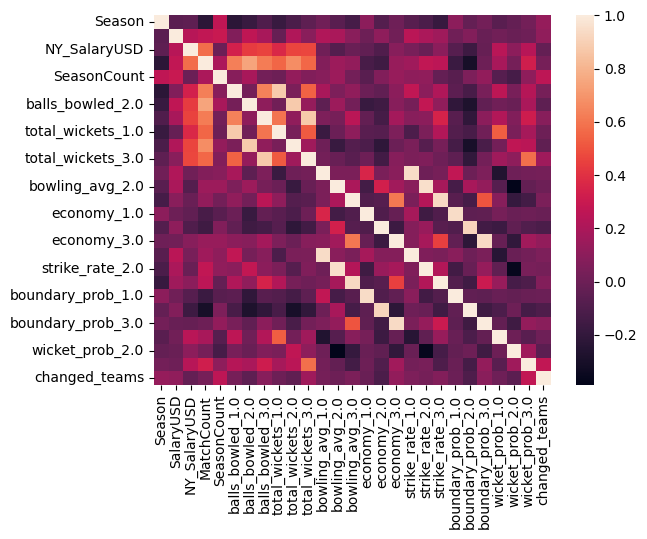

In [36]:
# find the correlations of the variables amongst each other
bowling_corr = bowling_salary_df.corr()
sns.heatmap(bowling_corr)
plt.show()

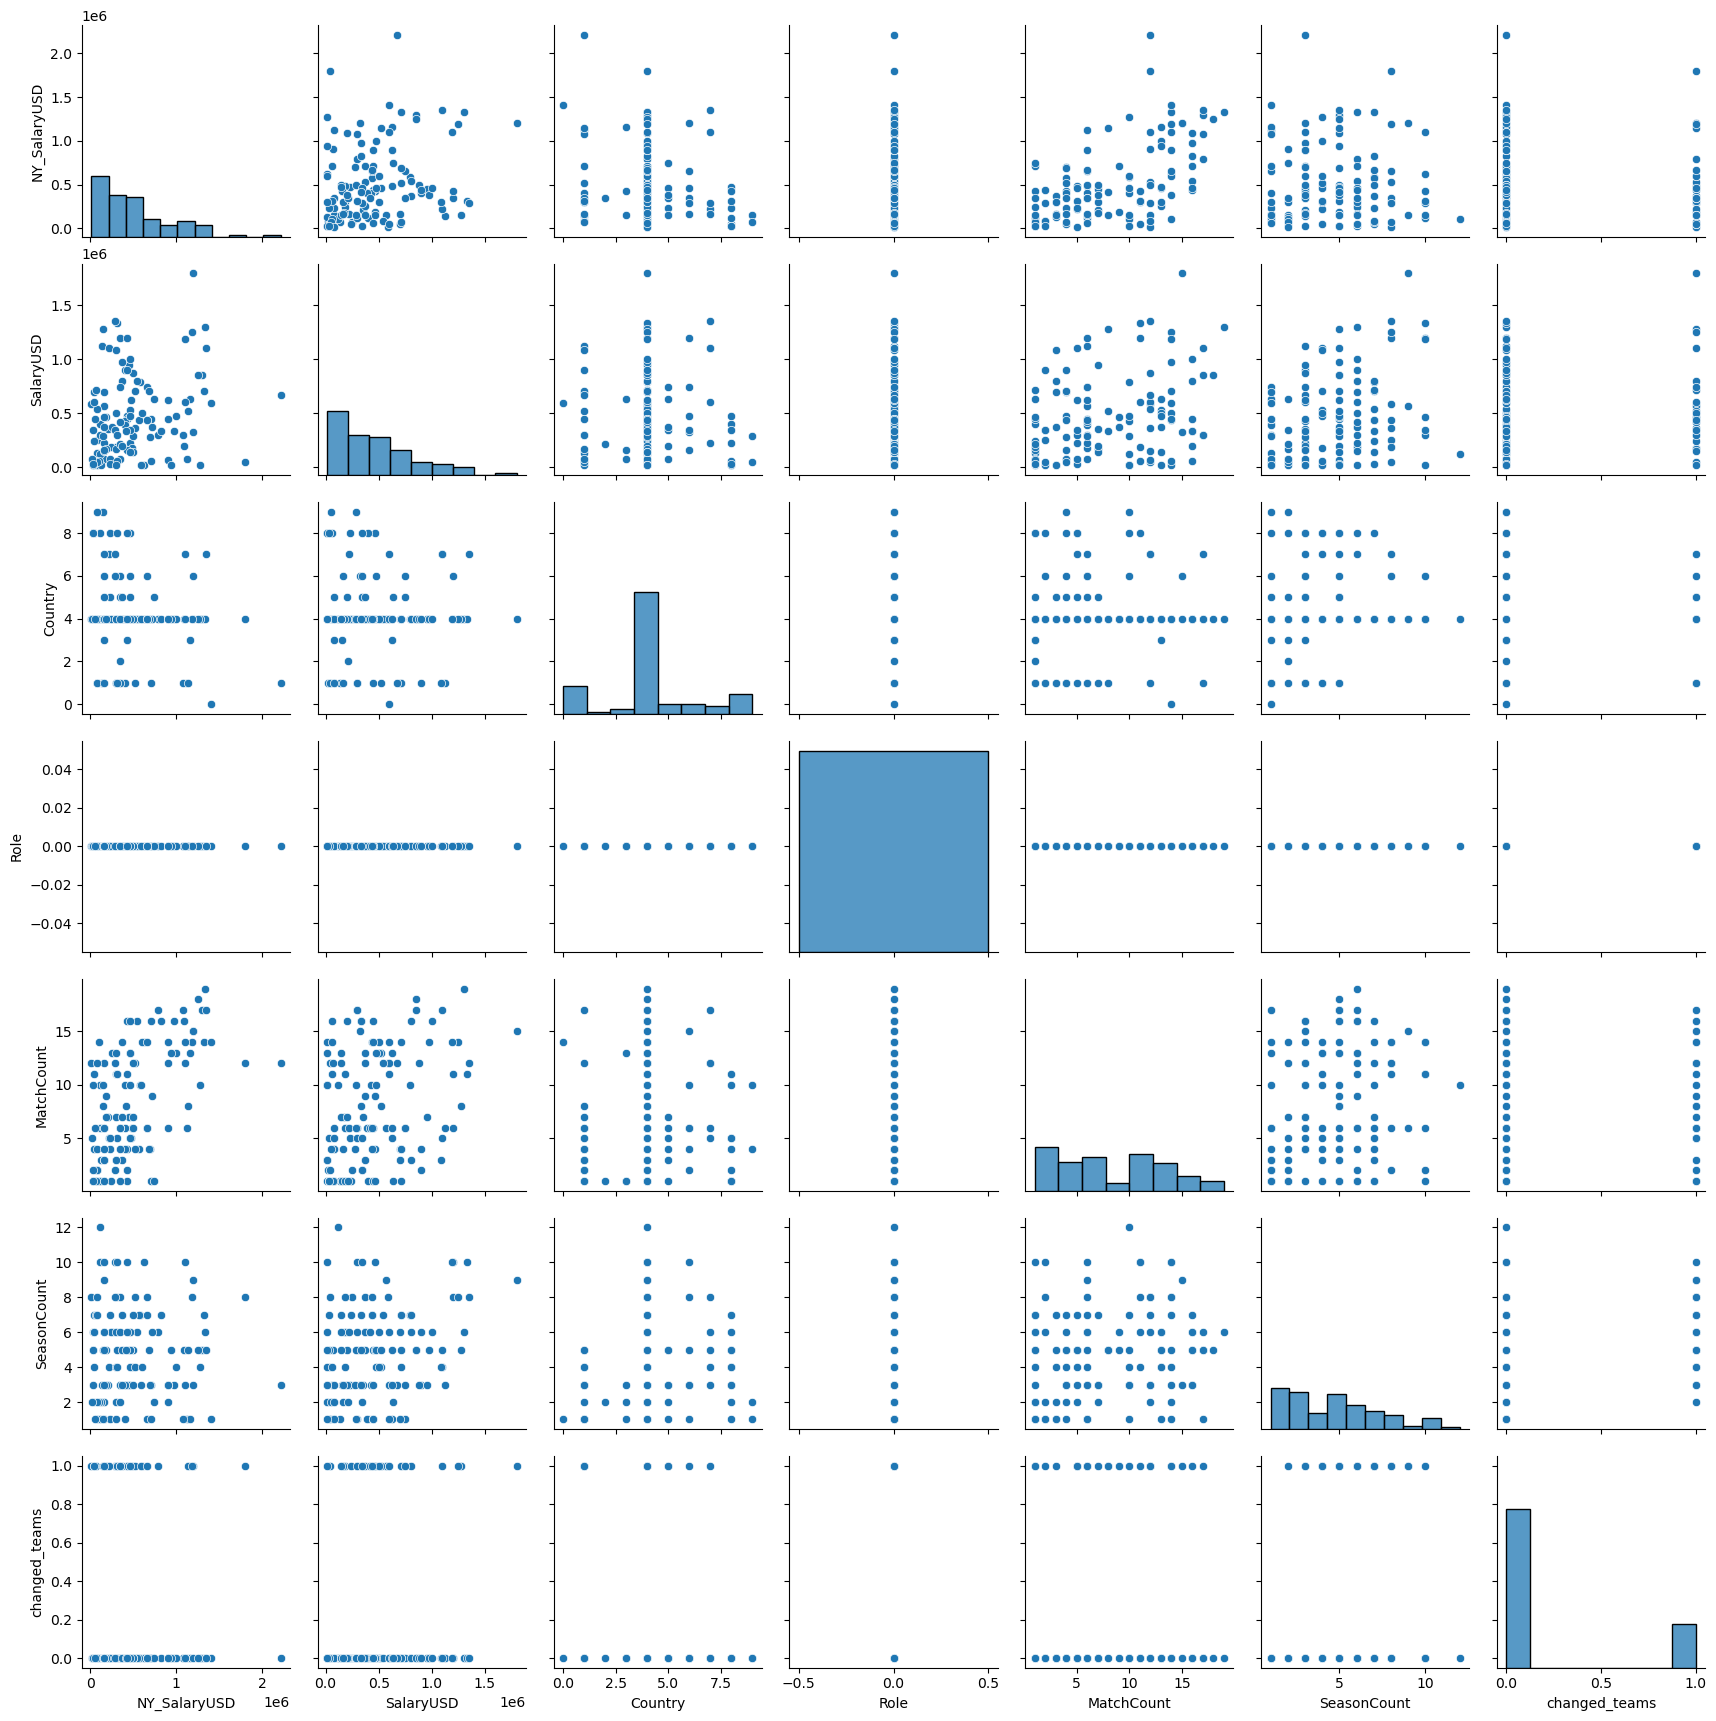

In [39]:
# Let us pairplot the NY_SalaryUSD with the other general player stats
gen_columns = ['NY_SalaryUSD', 'SalaryUSD', 'Country', 'Role', 'Team', 'MatchCount', 'SeasonCount', 'changed_teams']
gen_bowling_df = bowling_salary_df[gen_columns].copy()

# Perform label encoding for categorical variables
label_encoder = LabelEncoder()
gen_bowling_df['Country'] = label_encoder.fit_transform(gen_bowling_df['Country'])
gen_bowling_df['Role'] = label_encoder.fit_transform(gen_bowling_df['Role'])

sns.pairplot(gen_bowling_df)
plt.show()

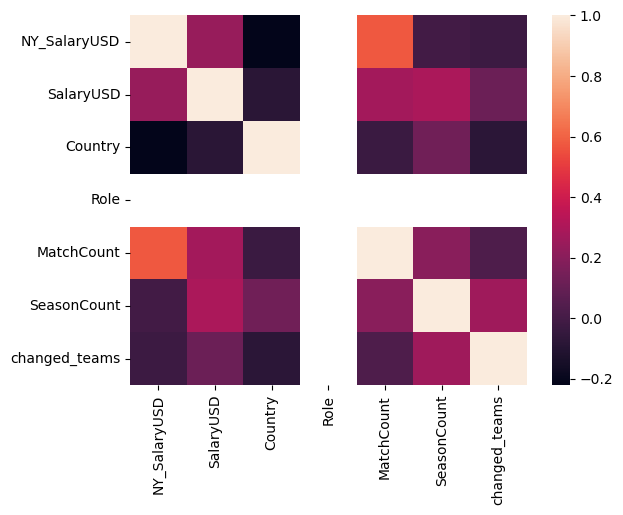

In [44]:
sns.heatmap(gen_bowling_df.corr())
plt.show()

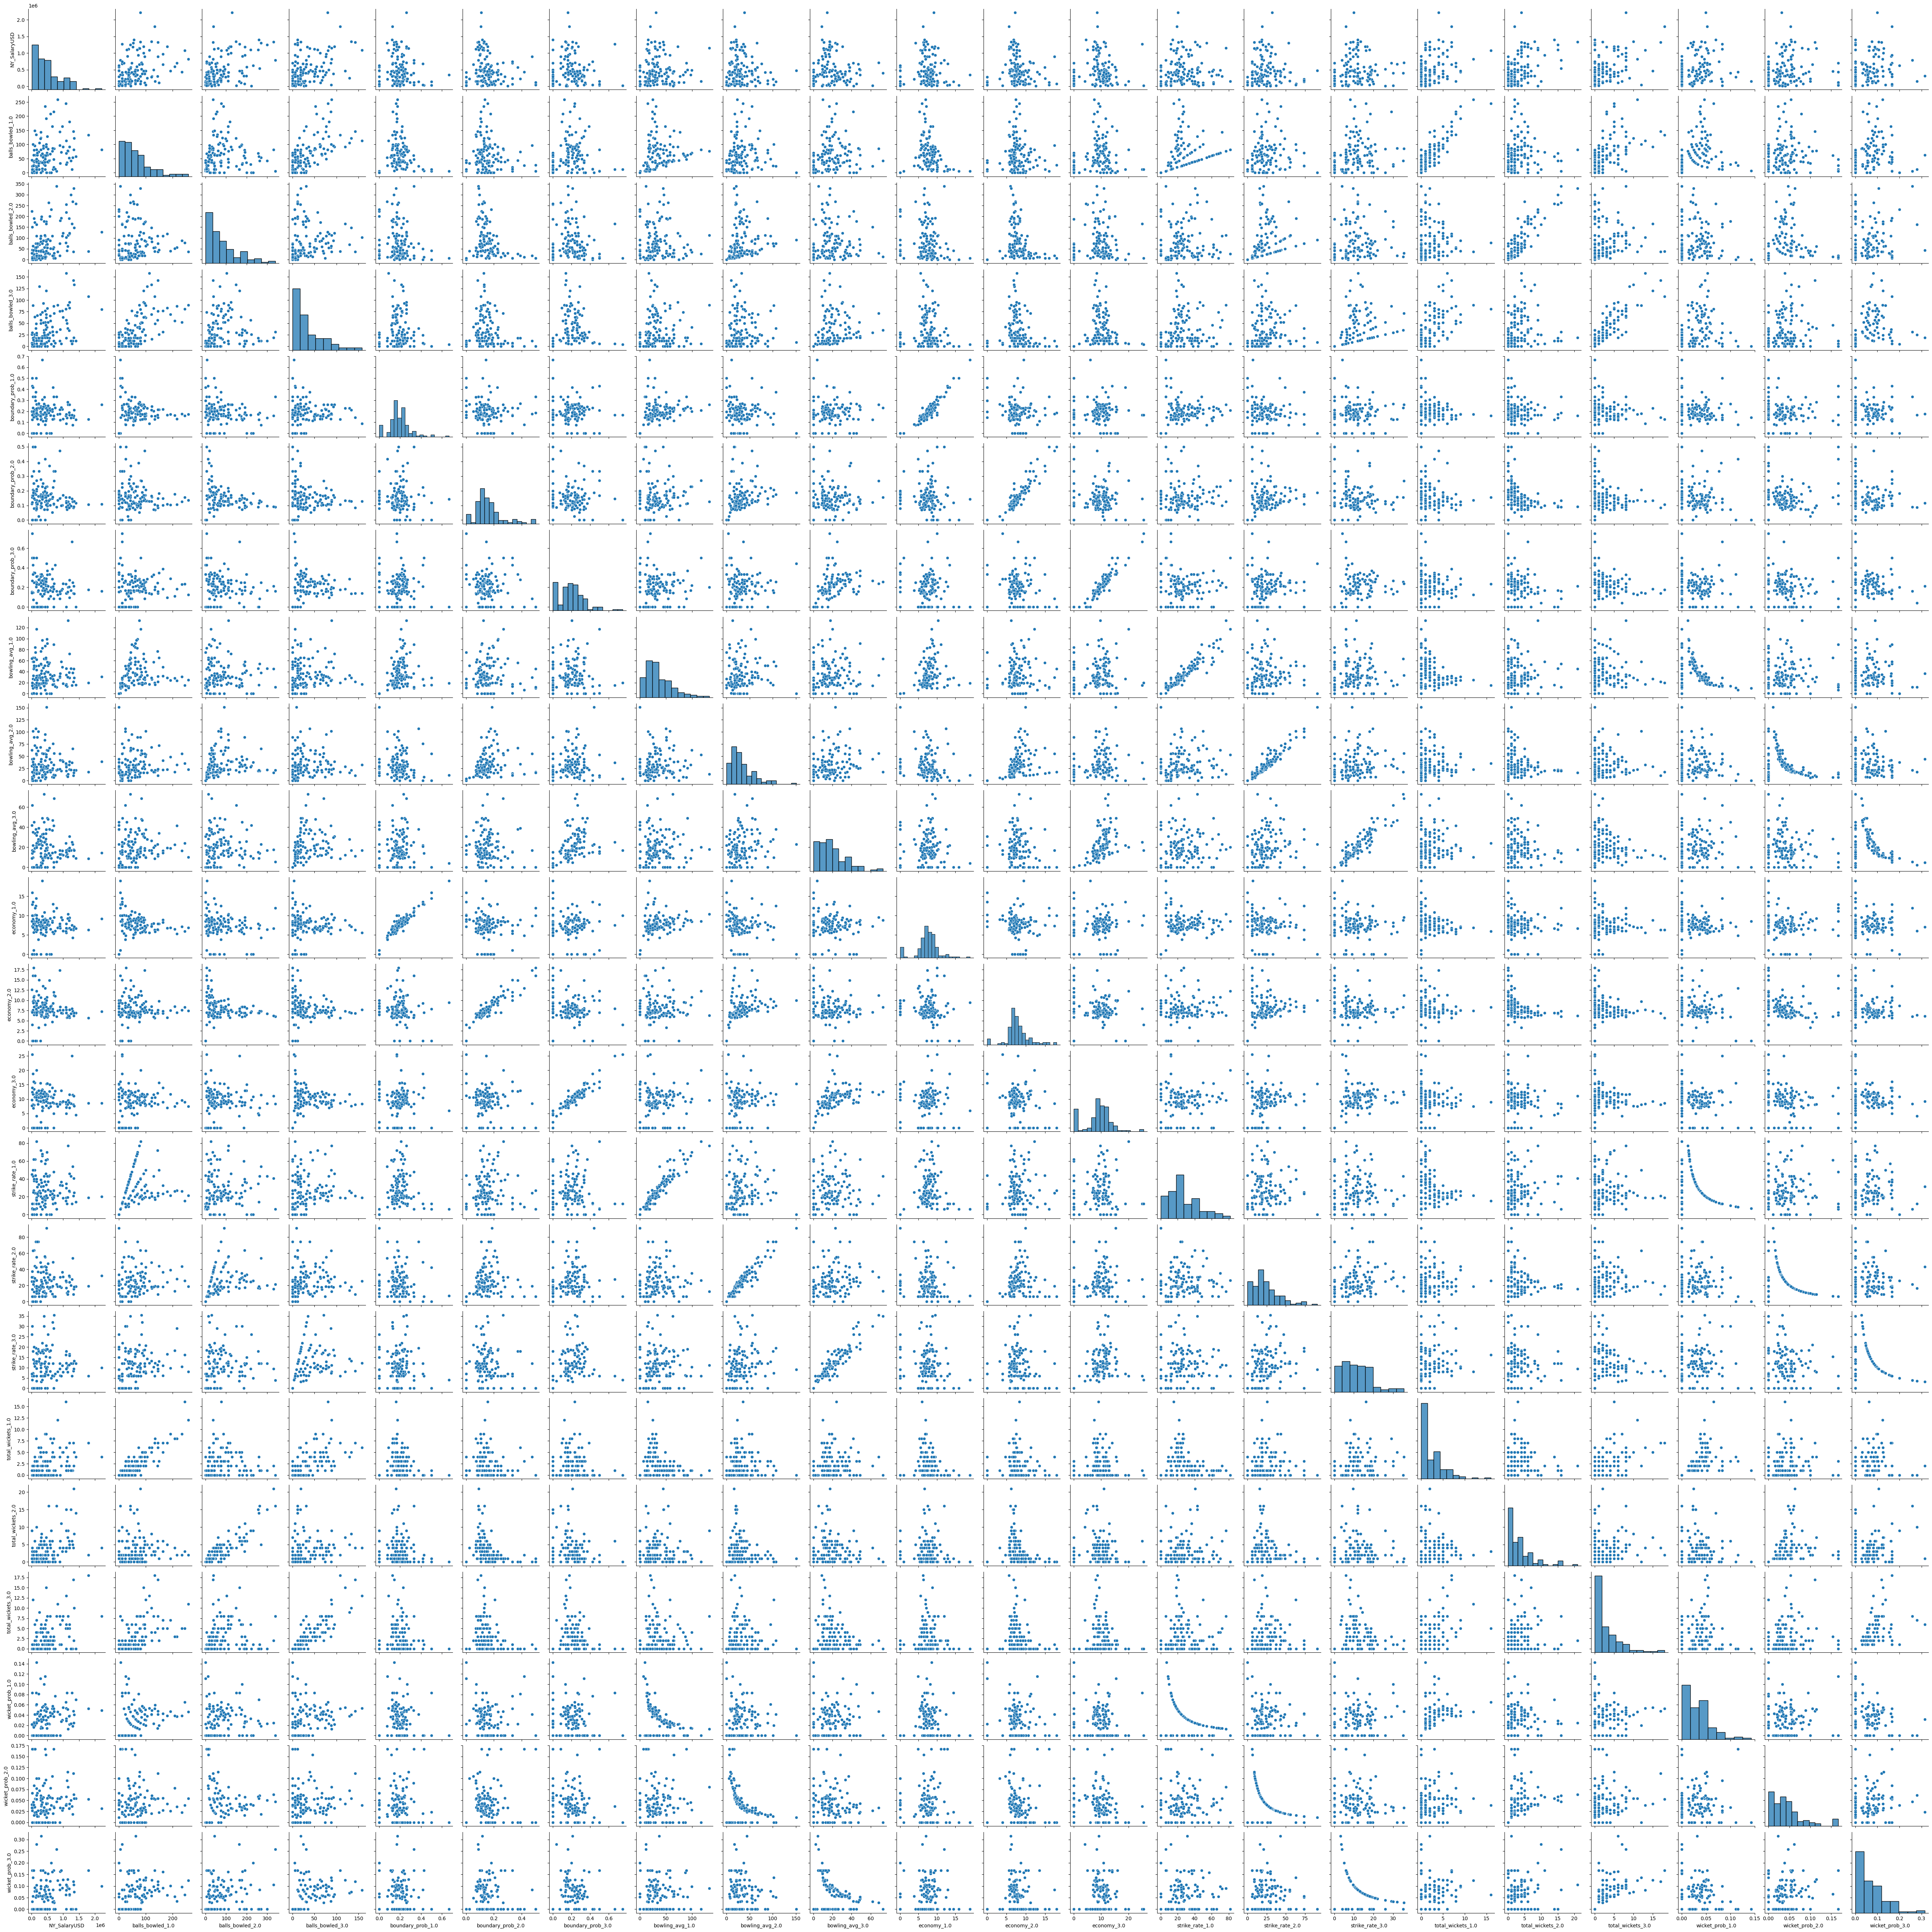

In [40]:
# Let's do the same thing for the statistics columns
stats_cols = list(set(bowling_salary_df.columns) - set(gen_columns[1:]))
stats_cols = [col for col in stats_cols if col not in ['Player', 'Season']]
stats_cols = sorted(stats_cols, key=lambda x: (x != 'NY_SalaryUSD', x))

stats_bowling_df = bowling_salary_df[stats_cols]
sns.pairplot(stats_bowling_df)
plt.show()


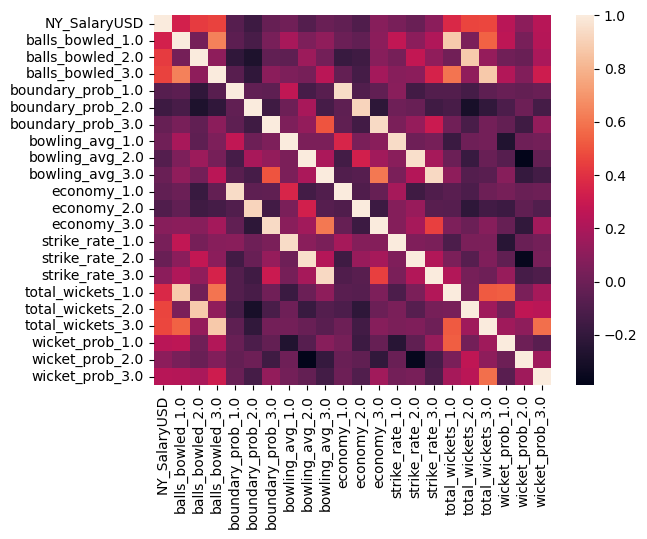

In [45]:
sns.heatmap(stats_bowling_df.corr())
plt.show()